In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [9]:
from shephard.apis import fasta
from shephard import interfaces

In [25]:
from sparrow import Protein

abf1 = Protein('NNNNNNDGELSGTNLRSNSIDYAKHQEISSAGTSSNTTKNVNNNKNDSNDDNNGNNNNDASNLMESVLDKTSSHRYQPKKMPSVNKWSKPDQITHSDVSMVGLDESNDGGNENVHPTLAEVDAQEARETAQLAIDKINSYKRSIDDKNGDGHNNSSRNVVDENLINDMDSEDAHKSKRQHLSDITLEERNEDDKLPHEVAEQLRLLSSHLKEVE')

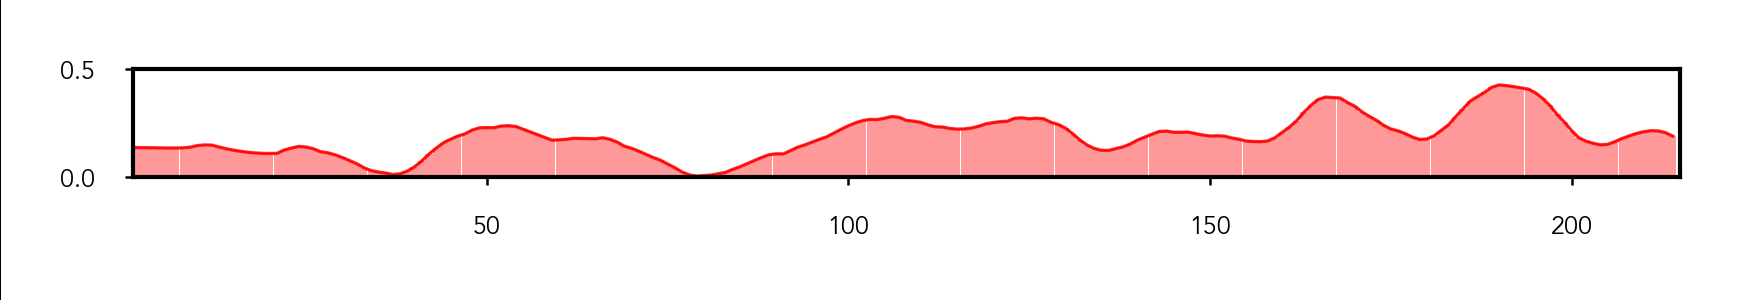

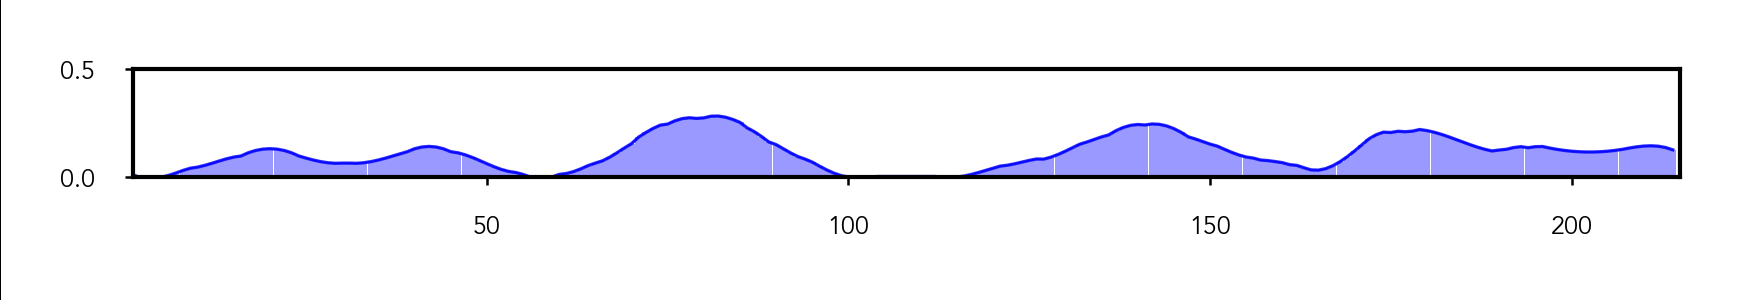

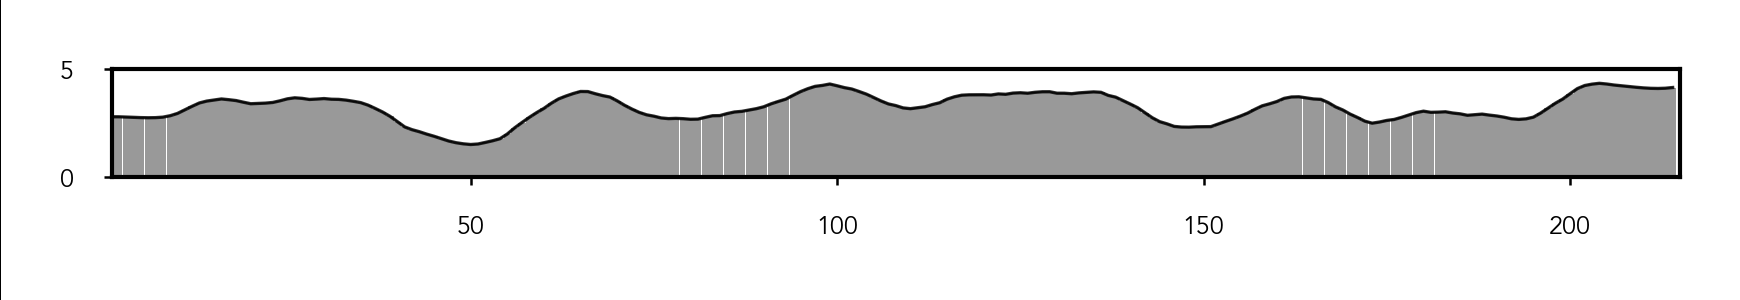

In [5]:

def plot_linear_prof(mode, color, outname, maxval=0.5):
    figure(num=None, figsize=(3, 0.6), dpi=300, facecolor='w', edgecolor='k', linewidth=0.1)
    ax = plt.gca()

    plt.bar(np.arange(1,len(abf1)+1),abf1.linear_sequence_profile(mode=mode,  window_size=15, smooth=15), color=color, width=0.99, alpha=0.4)
    plt.plot(np.arange(1,len(abf1)+1),abf1.linear_sequence_profile(mode=mode,  window_size=15, smooth=15), '-', color=color,  alpha=0.8,linewidth=0.4)
    plt.plot(np.arange(1,len(abf1)+1),abf1.linear_sequence_profile(mode=mode,  window_size=15, smooth=15), '-', color=color,  alpha=0.8,linewidth=0.2)
    plt.ylim([0,maxval])
    plt.xlim([1,len(abf1)+1])
    plt.yticks(fontsize=3)
    plt.xticks(fontsize=3)
    ax.tick_params(width=0.3,length=1)
    plt.tight_layout()
    plt.savefig(outname)
    
    
plot_linear_prof('negative', 'r', 'figures/negative.pdf')

plot_linear_prof('positive', 'b', 'figures/positive.pdf')

plot_linear_prof('hydrophobicity', 'k', 'figures/hydrophobicity.pdf', maxval=5)




In [18]:
abf1_orthos = fasta.fasta_to_proteome('../figure_1/data/ygob_abf1_orthologs.fasta', use_header_as_unique_ID=True)
interfaces.si_tracks.add_tracks_from_file(abf1_orthos,'../figure_1/data/conservation_scores_SHPRD.tsv', mode='values')

In [38]:
abf1_local = abf1_orthos.protein('YKL112W_Scerevisiae_YKL112W')
abf1_local.track('conservation')
idr_start = abf1_local.sequence.find(abf1.sequence)
idr_end   = idr_start + len(abf1.sequence)
conservation_values = abf1_local.track('conservation').values[idr_start:idr_end]

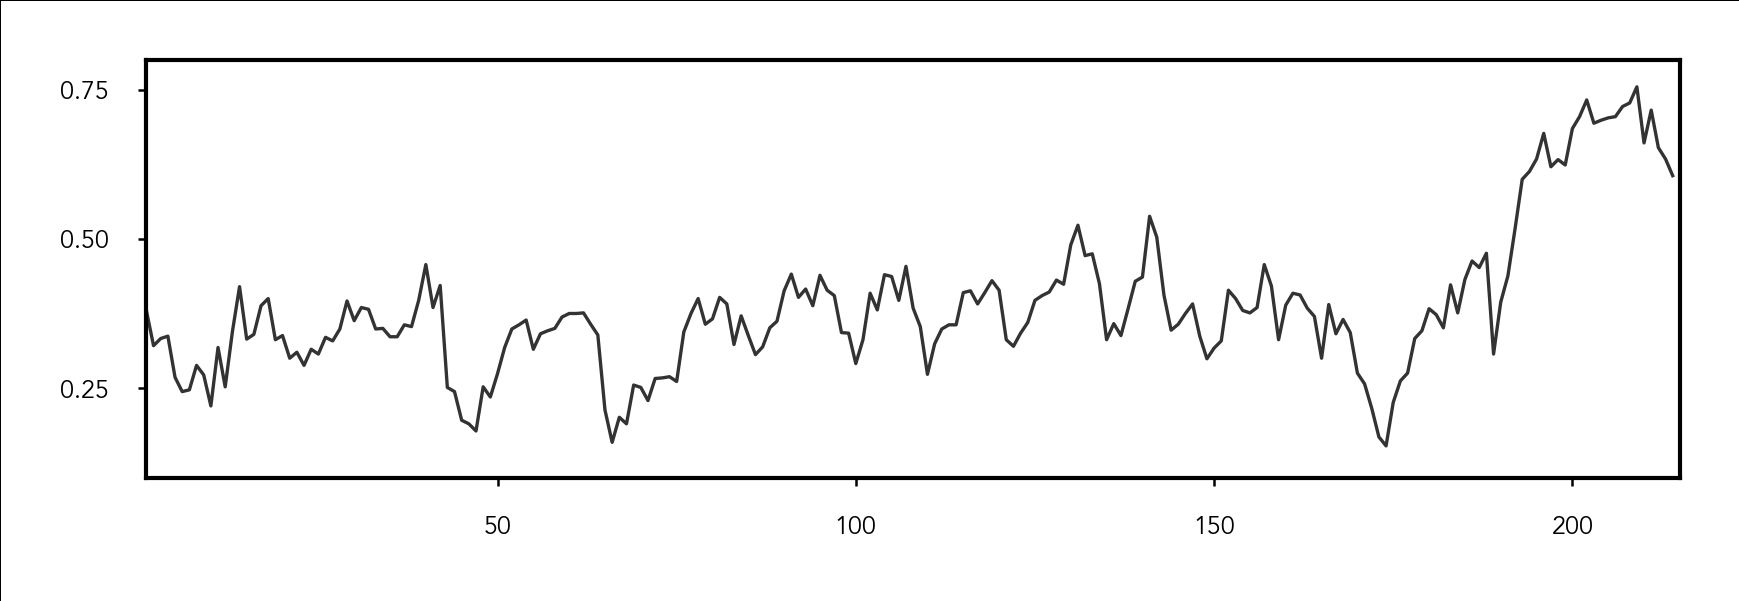

In [48]:
figure(num=None, figsize=(3, 1.1), dpi=300, facecolor='w', edgecolor='k', linewidth=0.1)
ax = plt.gca()

plt.plot(np.arange(1,len(abf1)+1), conservation_values, '-', color='k',  alpha=0.8,linewidth=0.4)

plt.ylim([0.1,0.8])
plt.xlim([1,len(abf1)+1])
plt.yticks(fontsize=3)
plt.xticks(fontsize=3)
ax.tick_params(width=0.3,length=1)
plt.tight_layout()
plt.savefig('figures/conservation_track.pdf')